## Final Project Submission

Please fill out: 
* Student name: Jeremy Nguyo
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: William Okomba
* Blog post URL:


# Multiple Linear Regression: Predicting King County, WA, Housing 

## 1. BUSINESS UNDERSTANDING

### 1.1 Understanding the Problem

The role assumed here is of a Data Scientist working for a Real Estate Agency. The Agency is in the business of helping homeowners buy and/or sell houses. The Agency and the homeowners reside in King County in the US State of Washington. The Agency has provided me with a dataset of house sales in King County. The task here is to model the real estate housing prices and use the model to accurately predict the housing prices based on a number of features provided within the dataset. The expectation is that, once completed, the model can be used by real estate agency, operating in the King County, as a tool in selecting properties for investment.

### 1.2 Analysis Questions

This analysis will seek to answer three questions about the data:

* <b>Question 1: </b> Which features are most highly correlated with price?

* <b>Question 2: </b> Which features have the strongest correlations with other predictor variables? 

* <b>Question 3: </b> What combinations of features is the best fit, in terms of predictive power, for a multiple regression model to predict house prices?



## 2. DATA UNDERSTANDING

### 2.1 Data Collection

Dataset for the project was provided by Moringa School as part of the Data Science course project for Phase 2. A Copy of the dataset is stored in the [Data](./Data) directory. The data is named as 'kc_house_data.csv'. Also contained in the folder is a file named as 'column_names.md' that contains the description of the data. 

### 2.2 Data Description

The dataset contains 21 columns. One is of the prices of the houses, which is our target variable, and the restwill be using to make our predictions. The column names and their descriptions are as follows:

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## 3. DATA PREPARATION

### 3.1 Importing Libraries

In [1]:
# pandas for data analysis and manipulation
import pandas as pd
# numpy for numerical operations
import numpy as np
# seaborn and matplotlib for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# sklear.metrics to measure classification performance
from sklearn.metrics import mean_absolute_error
# statsmodels.api for estimation of statistical methods
import statsmodels.api as sm
# filterwarnings to stop deprecation warnings
import warnings
warnings.filterwarnings('ignore')

### 3.2 Load and Exploring the data

In [2]:
# Preview of the first and last rows of the dataset
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
# Checked to see the datatype, number of columns and rows of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Most of the data types are `numeric` though we have a few `object` data types. The total number of rows is 21,597 and the number of columns in 21. 

In [4]:
# Checked the number of unique values for each column
df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

There seems to be some repeated values in the `id` column. I suspect this because the `id` column is a unique identifier, hence the total number of unique values for that column should be 21,597 and not 
21,420 as indicated above.

In [5]:
# check the toal number of null values in each column
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The columns `waterfront, view and yr_renovated` have 2376, 63 and 3842 null values respectively. This is something I'll have to further investigate

In [6]:
# perform a statistical summary of the data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


A statistical summary of all the columns containing numeric values is returned. The mean value of our traget variable, `price`, is approximately $540k while the median is $450k. The statistical summary of some of these columns doesn't make sense since these variables are categorical eg. zipcode, lat, long etc. This will be investigated later on. 

## 4. DATA CLEANING

Check for Validity, Accuracy, Completeness, Consistency and Uniformity of the Data

#### 4.1 Missing Values

The first thing that stands out when exploring the data was the missing values. The column `yr_renovated` has the largest amount of missing values, followed by `waterfront` and then `view` which has the least number. Further exploration on the missing values is needed before I can determine how to approach them.

In [7]:
# A look at the percentage of missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        perc = (df[col].isnull().sum()/len(df[col]))*100
        print("The column", col,"has",df[col].isnull().sum(),"missing values, which is", round(perc, 1),"% of it's total")

The column waterfront has 2376 missing values, which is 11.0 % of it's total
The column view has 63 missing values, which is 0.3 % of it's total
The column yr_renovated has 3842 missing values, which is 17.8 % of it's total


Further inspection of the columns one by one to check the number of unique values to better understand the data

`Waterfront Column`

In [8]:
print("The Waterfront Column\n")

print("Number of distinct elements is:", df['waterfront'].nunique(),"\n")

print("This is the count of unique values:")
print(df['waterfront'].value_counts(),"\n")

print('The unique values:')
print(df['waterfront'].unique(),"\n")

print("Number of missing values:",df['waterfront'].isnull().sum())

The Waterfront Column

Number of distinct elements is: 2 

This is the count of unique values:
NO     19075
YES      146
Name: waterfront, dtype: int64 

The unique values:
[nan 'NO' 'YES'] 

Number of missing values: 2376


The unique values are `nan, NO and YES`. The most common value in this column is `NO` with 19075 entries while `YES` has only 146. This means most of these houses don't have a waterfront hence I think it's safe to assume that the ones with missing values also don't have a waterfront. Therefore, I will replace the missing values with `NO`.

In [9]:
# replace missing values with 'NO'
df['waterfront'].fillna('NO',inplace=True)

# confirm if the missing values have been replaced
df['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

The `NO` entries have increased to 21451 from 19075 hence the replacement worked

In [10]:
# check data type 
df['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

We can see that waterfront is of type `object`. This is not compatible for our model hence I need to convert it to type `int`. Before changing the datatype, I first need to change the column to a binary column with `1` == `YES` and `0` == `NO`

In [11]:
# replace the values 'NO' and 'YES' with '0' and '1' respectively
df['waterfront'].replace({'NO': 0, 'YES': 1}, inplace=True)

#convert column to data type 'int'
df['waterfront'].astype(int)

#confirm if change occured
df['waterfront'].unique()

array([0, 1], dtype=int64)

The values have now changed to `1s` and `0s` and the datatype is now `integer`

`View Column`

In [12]:
print("The View Column\n")

print("Number of distinct elements is:", df['view'].nunique(),"\n")

print("This is the count of unique values:")
print(df['view'].value_counts(),"\n")

print('The unique values:')
print(df['view'].unique(),"\n")

print("Number of missing values:",df['view'].isnull().sum())

The View Column

Number of distinct elements is: 5 

This is the count of unique values:
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64 

The unique values:
['NONE' nan 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR'] 

Number of missing values: 63


`nan` should not be part of the unique values since it represents null values. The most common value in this column is `NONE`. So this means most of the houses don't have a view. It's safe to assume the 63 missing values also don't have a view. Therefore, I will replace the missing values with `NONE`

In [13]:
# replace missing values with 'NONE'
df['view'].fillna('NONE',inplace=True)

# confirm if the missing values have been replaced
df['view'].value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

The number of 'NONE" entries has increased from 19422 to 19485 thus the changes were made successfully.

`Year Renovated Column`

In [14]:
print("The yr_renovated Column\n")

print("Number of distinct elements is:", df['yr_renovated'].nunique(),"\n")

print("This is the count of unique values:")
print(df['yr_renovated'].value_counts(),"\n")

print('The unique values:')
print(df['yr_renovated'].unique(),"\n")

print("Number of missing values:",df['yr_renovated'].isnull().sum())

The yr_renovated Column

Number of distinct elements is: 70 

This is the count of unique values:
0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64 

The unique values:
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.] 

Number of missing values: 3842


`nan` also exists in the unique values of this column. The most common value in this column is `0.0`. The years run from 1948 to 2014. Based on this data only, it's not possible to know what `0.0` stands for. For now we'll have the missing values as `0.0` reason being that it's the most common entry.

In [15]:
# replace missing values with '0.0'
df['yr_renovated'].fillna(0.0,inplace=True)

# confirm if the missing values have been replaced
df['yr_renovated'].value_counts()

0.0       20853
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

The number of missing values increased from 17011 to 20853 menaing the changes were made successfully

In [16]:
# counter checking to see if there are any more missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

All missing values were replaced successfully.

#### 4.2 Conversion of Date Column and Creation of New Columns

The date column represents the month and year the houses were sold. Creating new columns `yr_sold` and `month_sold` from this column will make analyzing the data easier and then dropping it since it will not be useful anymore. 

In [17]:
# split the date into month, day and year
date = df['date'].str.split('/', expand=True)

# create new columns for month and year and convert to integer
df['month_sold'] = date[0].astype(int)
df['yr_sold'] = date[2].astype(int)

# drop original date column
df.drop(columns=['date'], axis=1, inplace=True)

# check to see if changed were made
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,yr_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,NONE,Average,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,NONE,Average,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,NONE,Average,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,NONE,Very Good,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,NONE,Average,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015


The new columns `month_sold` and `yr_sold` have been created and can be seen on the extreme right side of this dataframe. I decided to create a new column `age` to represent the age of the houses. To get the age of the house, I got the difference between the `yr_built` and the year `2015`. We have data for houses until the year 2015, so I based the age on this. 

In [18]:
# create new column 'age'
df['age'] = 2015 - df['yr_built']

# drop the column for yr_built since it's not longer useful
df.drop(columns=['yr_built'], axis=1, inplace=True)

# check to see if changes were made
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,yr_sold,age
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,NONE,Average,...,0.0,0.0,98178,47.5112,-122.257,1340,5650,10,2014,60
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,NONE,Average,...,400.0,1991.0,98125,47.7210,-122.319,1690,7639,12,2014,64
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,NONE,Average,...,0.0,0.0,98028,47.7379,-122.233,2720,8062,2,2015,82
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,NONE,Very Good,...,910.0,0.0,98136,47.5208,-122.393,1360,5000,12,2014,50
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,NONE,Average,...,0.0,0.0,98074,47.6168,-122.045,1800,7503,2,2015,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,NONE,Average,...,0.0,0.0,98103,47.6993,-122.346,1530,1509,5,2014,6
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,NONE,Average,...,0.0,0.0,98146,47.5107,-122.362,1830,7200,2,2015,1
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,NONE,Average,...,0.0,0.0,98144,47.5944,-122.299,1020,2007,6,2014,6
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0,NONE,Average,...,0.0,0.0,98027,47.5345,-122.069,1410,1287,1,2015,11


A new column representing age has been created and it's on the extreme right hand side of the dataframe. I decided to drop `id` column since it's not useful and to also avoid crowding the dataframe with too much data.

In [19]:
# drop ID column as it's not useful in this analysis
df.drop(columns='id', axis=1, inplace=True)

#### 4.3 Conversion of Data Types of Values in Columns from Object type to Float/Int Type

From the initial exploration, we can see that `sqft_basement` is of type `object`. This is quite unusual since we know that this column represents square footage of the basement. Let's do some exploration first to figure out why the datatype is not integer or float

In [20]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

First we need to account for a string value of '?', which was found when the first attempt to convert to type `int`failed. We can treat these values as null values. Since most of the values are at 0.0, it's fair to assume the values represented by '?' are 0.0 thus we replace the `?`.

In [21]:
# replace the ? with 0.0
df['sqft_basement'].replace('?','0.0',inplace=True)

#convert column to type 'float'
df['sqft_basement'] = df['sqft_basement'].astype(float)

#confirm if change occured
df['sqft_basement'].dtype

dtype('float64')

The columns was successfully converted to type `int`

## 5.0 DATA ANALYSIS

The target variable here is price, which is the sale price of the houses. The dataset contains many different potential predictors, so let's see the correlation with the target variable.

In [22]:
df.corr()['price']

price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.264306
sqft_above       0.605368
sqft_basement    0.321108
yr_renovated     0.117855
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
month_sold      -0.009928
yr_sold          0.003727
age             -0.053953
Name: price, dtype: float64

Since correlation is a measure related to regression modeling, we can see that there seems to be some relevant signal here, with lots of variables that have medium-to-strong correlations with price. 

### Step 1: Visualize Relationships Between Features and Target

For each feature in the dataset, I will create a scatter plot that shows the feature on the x-axis and Price on the y-axis.

#### Numeric Variables

In [23]:
# Identify the numeric variables
numeric_variables = df.select_dtypes("number")
numeric_variables

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,yr_sold,age
0,221900.0,3,1.00,1180,5650,1.0,0,1180,0.0,0.0,98178,47.5112,-122.257,1340,5650,10,2014,60
1,538000.0,3,2.25,2570,7242,2.0,0,2170,400.0,1991.0,98125,47.7210,-122.319,1690,7639,12,2014,64
2,180000.0,2,1.00,770,10000,1.0,0,770,0.0,0.0,98028,47.7379,-122.233,2720,8062,2,2015,82
3,604000.0,4,3.00,1960,5000,1.0,0,1050,910.0,0.0,98136,47.5208,-122.393,1360,5000,12,2014,50
4,510000.0,3,2.00,1680,8080,1.0,0,1680,0.0,0.0,98074,47.6168,-122.045,1800,7503,2,2015,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,1530,0.0,0.0,98103,47.6993,-122.346,1530,1509,5,2014,6
21593,400000.0,4,2.50,2310,5813,2.0,0,2310,0.0,0.0,98146,47.5107,-122.362,1830,7200,2,2015,1
21594,402101.0,2,0.75,1020,1350,2.0,0,1020,0.0,0.0,98144,47.5944,-122.299,1020,2007,6,2014,6
21595,400000.0,3,2.50,1600,2388,2.0,0,1600,0.0,0.0,98027,47.5345,-122.069,1410,1287,1,2015,11


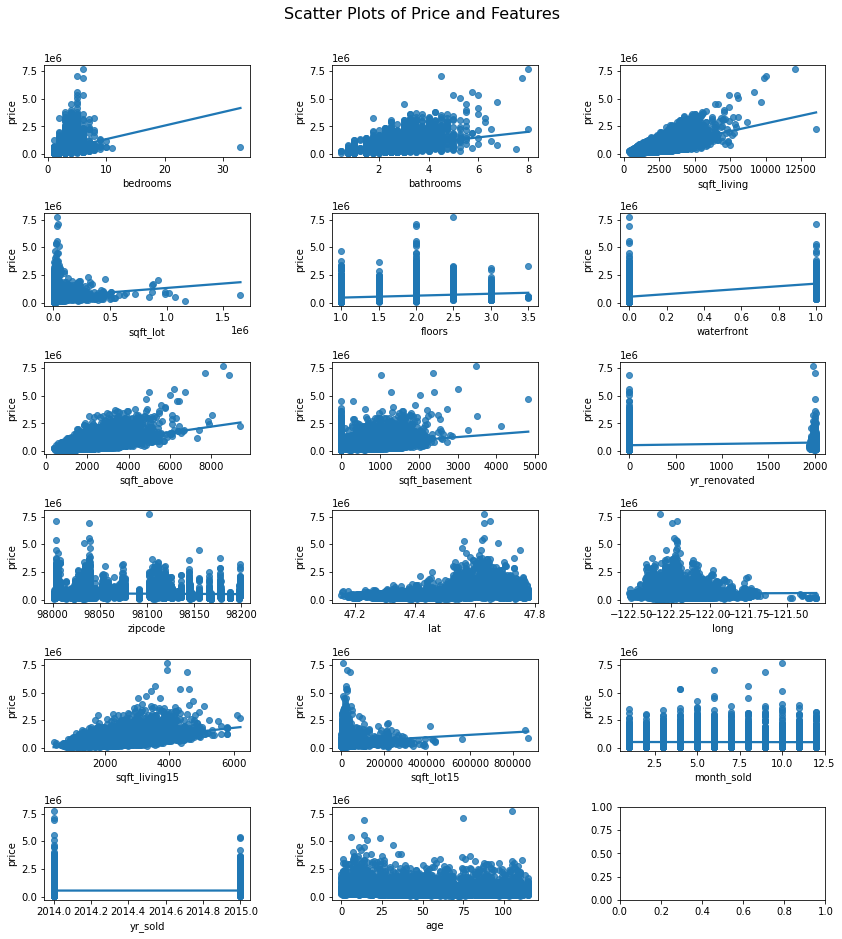

In [24]:
fig,ax = plt.subplots(figsize=(14,16), ncols=3, nrows=6)
fig.subplots_adjust(top=0.85)
fig.suptitle('Scatter Plots of Price and Features', y=0.9, fontsize=16)
cols = list(numeric_variables.drop(['price'],axis=1).columns)
plt.subplots_adjust(wspace = 0.4, hspace = 0.6)
for i,c in enumerate(cols):
    sns.regplot(x=c, y='price', ci=None, data=numeric_variables, ax=ax[i//3][i%3])
plt.savefig('Top 100 in profit by genre.png', dpi=300)    

##### Observations

It seems there are a number of categorical features. These include *floors, waterfront, yr_renovated, zipcode, month_sold and yr_sold*.

The regression line for the *bedrooms* feature shows a good positive correlation, but most points are bunched up between 0 and 11. There is also a very obvious outlier.

To simplify this analysis, I will focus on the features with the strongest correlations based on the correlation figures we got earlier on. A correlation threshold of 0.5 will be used. The features that meet this threshold, from the strongest correlated one to the weakest, include: *sqft_living, sqft_above, sqft_living15 and bathrooms*.

#### Categorical Variables

Apart from the categorical features that we have identified above that have type *number* values, we have other categorical features in the dataset. These are easily identifiable with their data type *object*. These features are *view, condition and grade*. These variables can not be displayed in a bar plot. 

First let's have a preview of the data in these columns

In [25]:
print("Preview of the 'view' column")
print(df['view'].value_counts(),'\n')

print("Preview of the 'condition' column")
print(df['condition'].value_counts(),'\n')

print("Preview of the 'grade' column")
print(df['grade'].value_counts(),'\n')

Preview of the 'view' column
NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64 

Preview of the 'condition' column
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64 

Preview of the 'grade' column
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64 



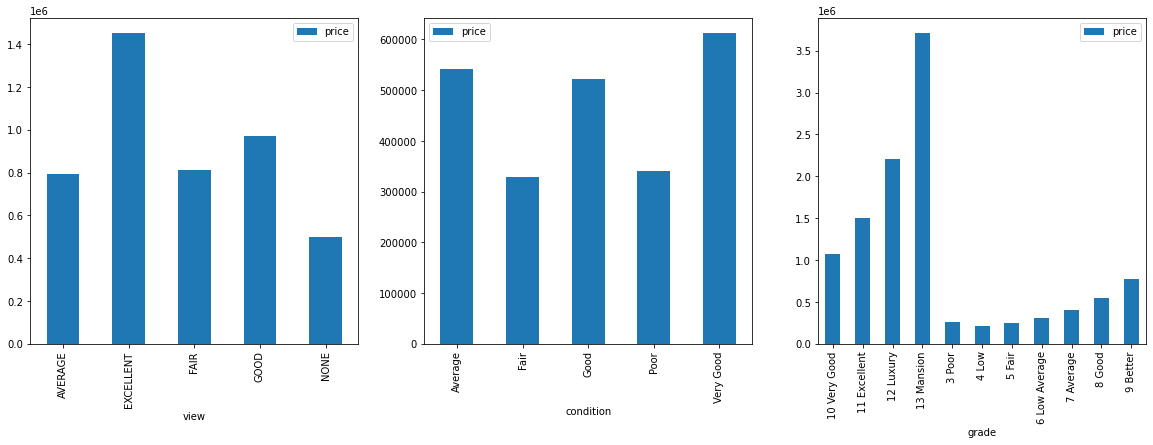

In [26]:
categorical_features = df.select_dtypes("object").columns
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(20,6))

for index, feature in enumerate(categorical_features):
    df.groupby(feature).mean().plot.bar(y="price", ax=axes[index])

Just from observing the graphs, the grade of the house seems to have the highest impact on the price but it has quite a number of categories which might make the analysis slightly complex. *Condition* doesn't seem to cause the price to vary much between the categories as compared to *view*. For this analysis, I'll go with view. 

### Step 2: Build a Baseline Simple Linear Regression Model

#### Identifying a Highly Correlated Predictor

The target variable is *price*. Looking at the the predictor variables we had picked earlier, *sqft_living, sqft_above, sqft_living15 and bathrooms* , *sqft_living* has the highest correlation with price.

#### Plotting the Predictor vs. Price

We'll also create a scatter plot of that variable vs. price:

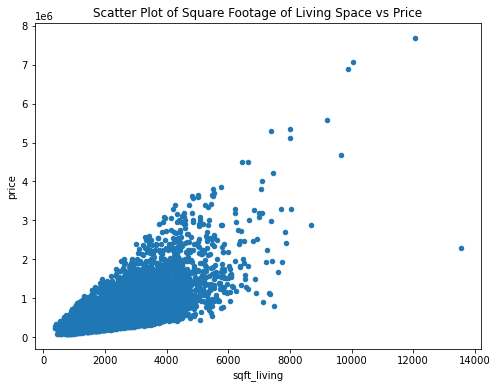

In [27]:
fig, ax = plt.subplots(figsize=(8,6))
df.plot.scatter(x='sqft_living', y='price', ax=ax)
plt.title('Scatter Plot of Square Footage of Living Space vs Price');

#### Setting Up Variables for Regression
Declaring y and X_baseline variables, where y is a Series containing price data and X_baseline is a DataFrame containing the column with the target variable.

In [28]:
y = df['price']

X_baseline = df['sqft_living']

#### Creating and Fitting Simple Linear Regression

In [29]:
baseline_model = sm.OLS(endog=y, exog=sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

### Step 3: Evaluate and Interpret Baseline Model Results

In [30]:
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:04:34   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

In [31]:
baseline_mae = mean_absolute_error(y, baseline_results.predict(sm.add_constant(X_baseline)))
baseline_mae

173824.88749617513

#### Observations

Our model is statistically significant overall with a Prob (F-statistic) value of 0.00 which is less than the standard alpha 0.05. The model also explains about 49% of the variance in price.

Both our intercept(const) and our coefficient for sqft_living are statistically significant with P>|t| values of 0.000 which are less than the standard alpha of 0.05.

Our intercept is about -43,990, meaning that a home with 0 square feet of living area would cost about- $43,990. This is not viable since we can't have a negative cost.

Our coefficient for sqft_living is about 208, which means that for each additional square foot of  living area, we expect the price to increase by about $208.


### Step 4: Prepare a Categorical Feature for Multiple Regression Modeling

Earlier on we had identified *view* as the column we'll use in our model. Let's go ahead and prepare it for analysis.

#### Setting Up Variables for Regression

For the multiple regression we will us the numeric variables we had identified earlier, *sqft_living, sqft_above, sqft_living15 and bathrooms*, and the categorical variable *view*.

In [32]:
# variable representing all the preferred numeric and categorical variables
X_multiple1 = df[["sqft_living", "sqft_above", "sqft_living15", "bathrooms", "view"]]


#### Preprocessing Categorical Variable by One Hot-Encoding

The *view* column represents the oquality of view from the house. In order to use this variable in a model, it needs to be transformed and this will be done by creating multiple dummy variables, one for each category of the categorical variable.


In [33]:
# one-hot encode the categorical column in X_iterated
X_multiple1 = pd.get_dummies(X_multiple1, columns=['view'])
X_multiple1

,sqft_living,sqft_above,sqft_living15,bathrooms,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
0,1180,1180,1340,1.00,0,0,0,0,1
1,2570,2170,1690,2.25,0,0,0,0,1
2,770,770,2720,1.00,0,0,0,0,1
3,1960,1050,1360,3.00,0,0,0,0,1
4,1680,1680,1800,2.00,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
21592,1530,1530,1530,2.50,0,0,0,0,1
21593,2310,2310,1830,2.50,0,0,0,0,1
21594,1020,1020,1020,0.75,0,0,0,0,1
21595,1600,1600,1410,2.50,0,0,0,0,1


To avoid the dummy variable trap, I picked the *view_NONE* column as a reference point. This will allow us to see the impact on the price of the house when it has a view compared to one that doesn't. *view_NONE* just means no view. 

In [34]:
X_multiple1.drop("view_NONE", axis=1, inplace=True)
X_multiple1

,sqft_living,sqft_above,sqft_living15,bathrooms,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD
0,1180,1180,1340,1.00,0,0,0,0
1,2570,2170,1690,2.25,0,0,0,0
2,770,770,2720,1.00,0,0,0,0
3,1960,1050,1360,3.00,0,0,0,0
4,1680,1680,1800,2.00,0,0,0,0
...,...,...,...,...,...,...,...,...
21592,1530,1530,1530,2.50,0,0,0,0
21593,2310,2310,1830,2.50,0,0,0,0
21594,1020,1020,1020,0.75,0,0,0,0
21595,1600,1600,1410,2.50,0,0,0,0


### Step 5. Build a Multiple Linear Regression Model

Using the y variable from our baseline model and X_iterated, we build a model called multiple1_model and a regression results object called multiple1_results.

In [35]:
multiple1_model = sm.OLS(y, sm.add_constant(X_multiple1))
multiple1_results = multiple1_model.fit()

### Step 6. Evaluate and Interpret Multiple Linear Regression Model Results

In [36]:
print(multiple1_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     3256.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:04:34   Log-Likelihood:            -2.9885e+05
No. Observations:               21597   AIC:                         5.977e+05
Df Residuals:                   21588   BIC:                         5.978e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6.058e+04   5893.705    -10.

In [37]:
iterated_mae = mean_absolute_error(y, multiple1_results.predict(sm.add_constant(X_multiple1)))
baseline_mae, iterated_mae

(173824.88749617513, 165386.53939805215)

#### Observations

Overall the model performed marginally better. We were off by about $165,386 rather than $173,824 in a given prediction, and explained 54.7% rather than 49.3% of the variance in price. 
The overall model is statistically significant with a Prob (F-statistic) of 0.00 which is less than the standard alpha of 0.05.

All of the coefficients are statistically significant with a P>|t| of 0.00 which is less than the standard alpha 0.05 except *sqft_above* and *bathrooms* which have a P>|t| above 0.05. 

* The intercept(const) is at about -$60,580. This means that a house with 0 value for all the features and it has no view, then it would cost -$60,580.
* The coefficient for `sqft_living` is about $227. This means for each square foot of living space, the house costs about $227 more. We note that this is very similar to the `sqft_living` coefficient for the baseline model.
* The coefficient for `sqft_living15` is about $52. This means an increase of 1 square footage in average square footage of the living spaces in the neighboring 15 houses, the house price costs about $52 more.
* The coefficients for `view` range from about $119k to about $603k
  * For a view of "Average" compared to a view of "None", we expect +$119k price
  * For a view of "Excellent" compared to a view of "None"", we expect +$603k price
  * For a view of "Fair" compared to a view of "None"", we expect +$160k price
  * For a view of "Good" compared to a view of "None"", we expect +$203k price


